In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
google_data = pd.read_csv('C:/Users/Muhammad Durraiz/googleplaystore.csv')

In [ ]:
google_data.head()

In [ ]:
google_data.shape

In [ ]:
google_data.describe()

In [ ]:
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

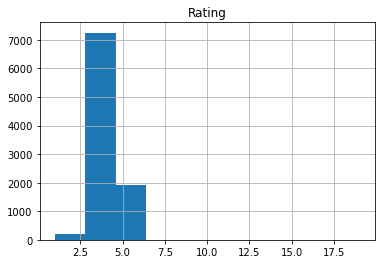

In [7]:
google_data.hist()

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
google_data.drop([10472],inplace=True)

KeyError: '[10472] not found in axis'

In [36]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

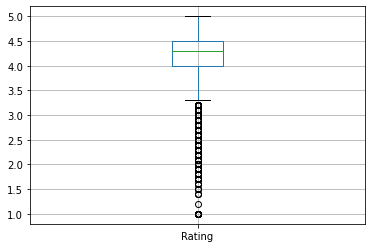

In [15]:
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

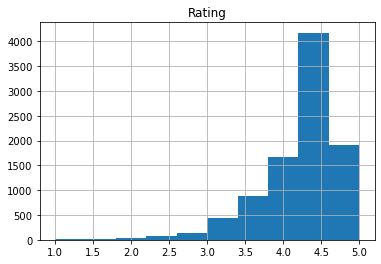

In [16]:
google_data.hist()

In [17]:
threshold = len(google_data)*0.1
threshold

1084.0

In [18]:
google_data.dropna(thresh=threshold, axis=1, inplace=True)#dropping columns which have 90% of data missing in them

In [19]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [20]:
def impute_median(series):
    return series.fillna(series.median())
    

In [21]:
google_data.Rating= google_data['Rating'].transform(impute_median)

In [22]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [23]:
google_data['Type'].mode()




0    Free
dtype: object

In [24]:
google_data['Current Ver'].mode()

0    Varies with device
dtype: object

In [25]:
google_data['Android Ver'].mode()

0    4.1 and up
dtype: object

In [26]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)#values[0] filling with first modal value incase multiple modes exist
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)


In [71]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
google_data['Price']=google_data['Price'].apply(lambda x:str(x).replace('$','')if('$') in str(x) else str(x))#lamda functions are anonymous functions, this one just replaces dollar with nothing if dollar exists in value
google_data['Price']=google_data['Price'].apply(lambda x:float(x))#converts string to float

In [28]:
google_data['Reviews']=pd.to_numeric(google_data['Reviews'],errors='coerce')#errors{'ignore', 'raise', 'coerce'}, default 'raise' If 'raise', then invalid parsing will raise an exception. If 'coerce', then invalid parsing will be set as NaN. If 'ignore', then invalid parsing will return the input.

In [29]:
google_data['Installs']=google_data['Installs'].apply(lambda x:str(x).replace('+','')if('+') in str(x) else str(x))
google_data['Installs']=google_data['Installs'].apply(lambda x:str(x).replace(',','')if(',') in str(x) else str(x))
google_data['Installs']=pd.to_numeric(google_data['Installs'],errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [30]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [31]:
grp = google_data.groupby('Category')
grp1 = google_data.groupby('')

In [58]:
avg_rate= grp['Rating'].agg(np.mean)
num_of_installs= grp['Installs'].agg(np.sum)
avg_price=grp['Price'].agg(np.mean)
num_of_reviews=grp['Reviews'].agg(np.sum)

In [59]:
num_of_reviews

Category
ART_AND_DESIGN            1714440
AUTO_AND_VEHICLES         1163666
BEAUTY                     396240
BOOKS_AND_REFERENCE      21959069
BUSINESS                 13954552
COMICS                    3383276
COMMUNICATION           815462260
DATING                    7291278
EDUCATION                39595786
ENTERTAINMENT            59178154
EVENTS                     161018
FAMILY                  410226330
FINANCE                  17550728
FOOD_AND_DRINK            8883330
GAME                   1585422349
HEALTH_AND_FITNESS       37893743
HOUSE_AND_HOME            3976385
LIBRARIES_AND_DEMO        1037118
LIFESTYLE                12882784
MAPS_AND_NAVIGATION      30659254
MEDICAL                   1585975
NEWS_AND_MAGAZINES       54400863
PARENTING                  958331
PERSONALIZATION          89346140
PHOTOGRAPHY             213516650
PRODUCTIVITY            114116975
SHOPPING                115041222
SOCIAL                  621241422
SPORTS                   70830169
TOOLS

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_302248/1808925514.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(avg_rate, 'ro',color='b')


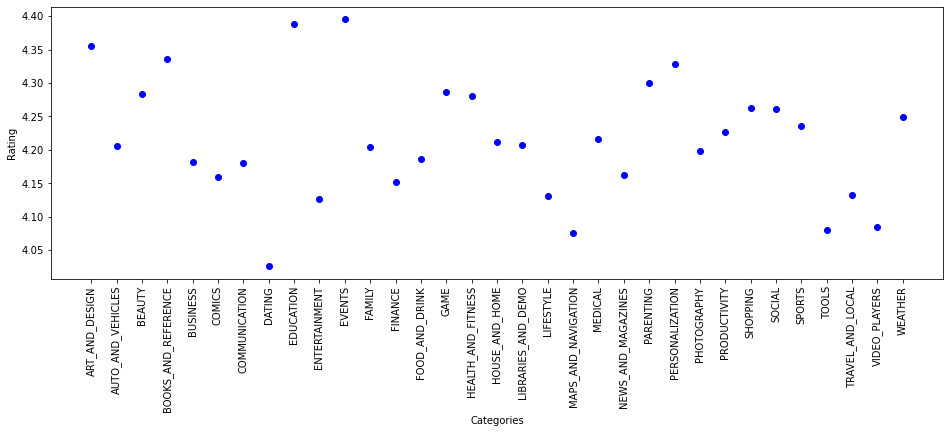

In [64]:
plt.figure(figsize=(16,5)) 
plt.plot(avg_rate, 'ro',color='b')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.show()

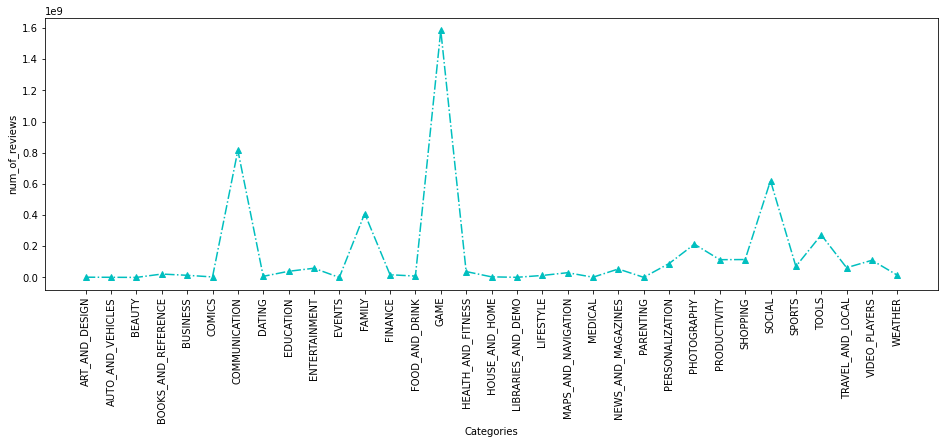

In [74]:
plt.figure(figsize=(16,5)) 
plt.plot(num_of_reviews, 'c^-.')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('num_of_reviews')
plt.show()

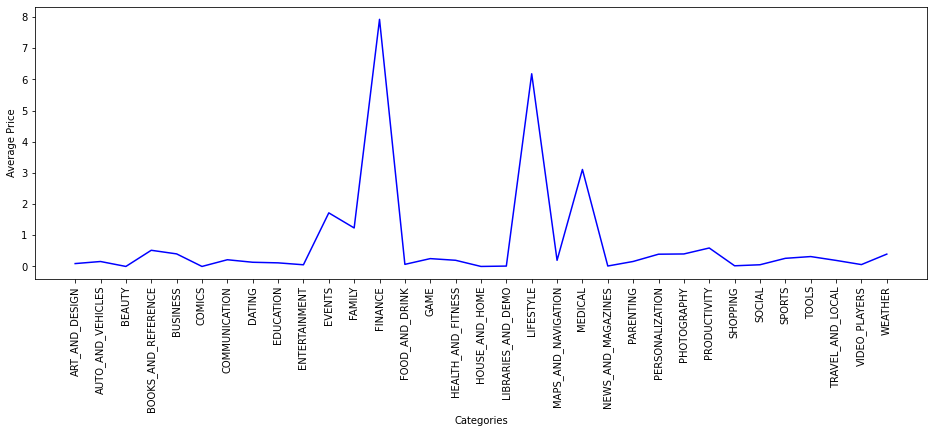

In [67]:
plt.figure(figsize=(16,5)) 
plt.plot(avg_price,color='b')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Average Price')
plt.show()

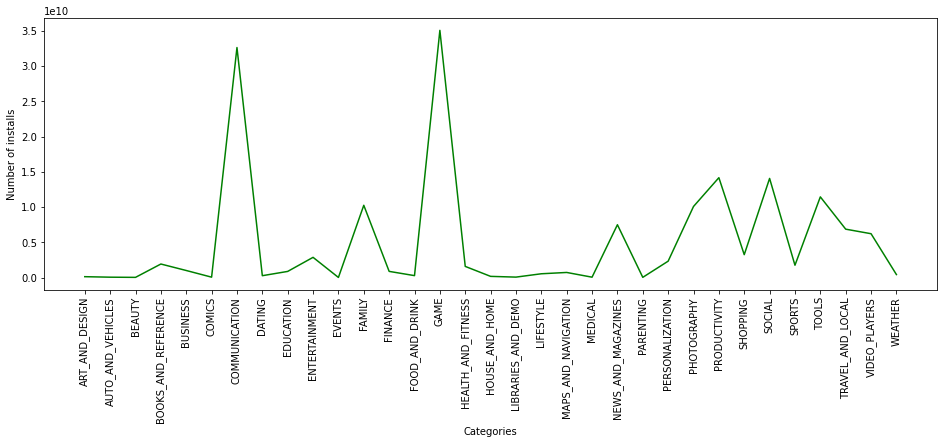

In [73]:
plt.figure(figsize=(16,5)) 
plt.plot(num_of_installs,color='g')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of installs')
plt.show()